NeuralZoo

CIFAR-10 est un ensemble de données très utilisé comme point de référence pour la comparaison de différentes méthodes d'apprentissage automatique et pour évaluer les performances des algorithmes de classification d'images.

Il se compose d'un total de 60 000 images en couleur de taille 32x32 pixels, divisées en 10 classes distinctes, chacune contenant 6000 images.

Les classes sont les suivantes : avion, automobile, oiseau, chat, cerf, chien, grenouille, cheval, navire et camions. Le dataset est réparti en un ensemble d'entraînement de 50 000 images et un ensemble de test de 10 000 images.

Import des librairies nécessaires

In [27]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Subset
from collections import Counter
import pandas as pd
import numpy as np


Transformation des images en tenseurs

Pourquoi transformer les images en tenseurs ?

Transformer les images en tenseurs permet de rendre les données compatibles avec PyTorch et de profiter de la puissance de calcul du GPU pour l'entraînement des modèles. Cela permet également de réaliser facilement des opérations mathématiques, des transformations, et de préparer les données pour les modèles d'apprentissage profond. C'est une étape essentielle dans le pipeline de traitement des données pour l'apprentissage automatique.

In [28]:
# 1. Transformation : images en tenseurs
transform = transforms.ToTensor()

# 2. Chargement du dataset CIFAR-10 uniquement pour l'entraînement
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

Filtrer les classes animales

In [29]:
# 3. Définir les classes animales
classes_animaux = ['bird', 'cat', 'deer', 'dog', 'frog', 'horse']
label_to_class = {i: name for i, name in enumerate(trainset.classes)}

# 4. Filtrer les indices des animaux dans l'ensemble d'entraînement
indices_train_animaux = [i for i, (_, label) in enumerate(trainset) if label_to_class[label] in classes_animaux]

Création du sous-ensemble d'images animales

In [30]:
# 5. Création du sous-ensemble pour les animaux
train_animaux = Subset(trainset, indices_train_animaux)

Vérification de la répartition des classes animales

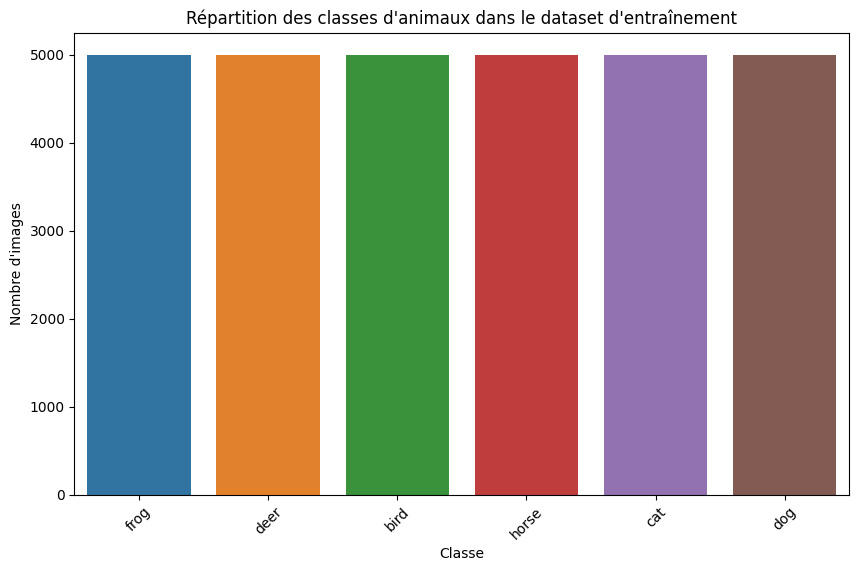

Répartition des classes dans le dataset d'entraînement animal :
       Count
frog    5000
deer    5000
bird    5000
horse   5000
cat     5000
dog     5000


In [31]:
# Vérification de la répartition des classes animales dans le sous-ensemble
labels = [label_to_class[label] for _, label in train_animaux]
class_counts = Counter(labels)

# Convertir en DataFrame pour une meilleure visualisation
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count'])
class_counts_df = class_counts_df.sort_values(by='Count', ascending=False)

# Affichage de la répartition des classes animales
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts_df.index, y=class_counts_df['Count'])
plt.title('Répartition des classes d\'animaux dans le dataset d\'entraînement')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'images')
plt.xticks(rotation=45)
plt.show()

# Affichage de la répartition sous forme de DataFrame pour vérification
print(f"Répartition des classes dans le dataset d\'entraînement animal :\n{class_counts_df}")


Affichage d'une image de chaque classe animale

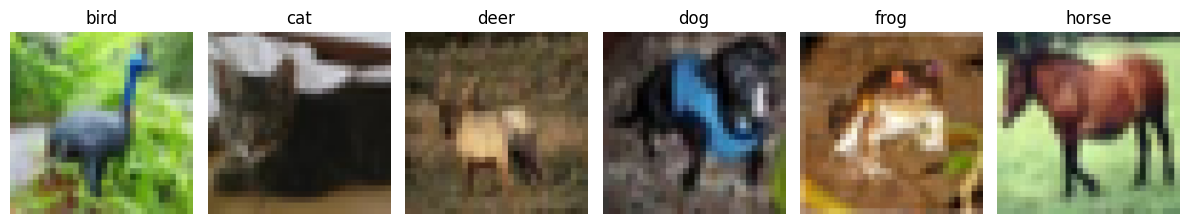

In [32]:
# 6. Sélectionner une image de chaque classe
images_par_classe = {}
for class_name in classes_animaux:
    for idx, (img, label) in enumerate(train_animaux):
        if label_to_class[label] == class_name and class_name not in images_par_classe:
            images_par_classe[class_name] = img
            break  # Sortir dès qu'on a trouvé une image

# 7. Affichage de quelques images par classe
plt.figure(figsize=(12, 4))
for i, class_name in enumerate(classes_animaux):
    img = images_par_classe[class_name]
    
    # Resize propre en 128x128 avec interpolation nearest (pixels nets)
    img_upscaled = transforms.functional.resize(img, size=[128, 128], interpolation=transforms.InterpolationMode.NEAREST)
    img_np = img_upscaled.numpy().transpose((1, 2, 0))  # CHW → HWC

    plt.subplot(1, len(classes_animaux), i + 1)
    plt.imshow(img_np)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

Vérification des dimensions des images et des statistiques

In [33]:
# 8. Statistiques sur la forme des images
sample_image, _ = train_animaux[0]
print(f"Dimension d'une image : {sample_image.shape}")  # (C, H, W)

# 9. Statistiques sur les pixels : moyenne et écart-type
all_pixels = np.concatenate([img.numpy().flatten() for img, _ in train_animaux])
mean_pixel_value = np.mean(all_pixels)
std_pixel_value = np.std(all_pixels)
print(f"Valeur moyenne des pixels : {mean_pixel_value:.4f}")
print(f"Écart-type des pixels : {std_pixel_value:.4f}")


Dimension d'une image : torch.Size([3, 32, 32])
Valeur moyenne des pixels : 0.4511
Écart-type des pixels : 0.2402
